In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.special import erfc # erf = 1- erfc  
import matplotlib.pyplot as plt
import seaborn as sns



We use the fact that of the model is correct, then  
$\frac{ (v_j \cdot Z)^2}{\lambda_j} \sim \chi_1^2$.

Also note that   
$\mathbb{E}[(v_j \cdot Z)^2] = \lambda_j,$  
where $v_j, \lambda_j$ are eigen vector and eigenvalue.


In [2]:
def my_sim1(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5, cov_index=1):

    x = np.random.uniform(x_min, x_max, n)
    y = np.random.uniform(y_min, y_max, n)

    s = x[:, None] - x
    t = y[:, None] - y

    # 1) separable model
    cov_mat1 = theta * np.exp(-np.abs(t) / range_val) * theta * np.exp(-np.abs(s) / range_val)


    eps = 1e-8
    abs_s = np.abs(s)

    a = 0.5
    c = 0.3

    # 2) symmetric, smoother along the axes MA 2003 (5.3)

    tmp1 = np.exp(-a * t) * ( erfc(np.sqrt(abs_s + eps) - a * t / (2 * np.sqrt(abs_s + eps))))
    tmp2 = np.exp( a*t) * erfc( np.sqrt(abs_s+ eps ) + a*t/(2*np.sqrt(abs_s+ eps )   )  )
    cov_mat2 = tmp1 + tmp2


    # lacking full symmetry
    a = 10
    beta_1 = 3
    beta_2 = 4
    c1 = a / beta_1**2
    c2 = a / beta_2**2
    b = 1
    var = 1 / 12 * (x_max - x_min)**2

    eps = 1e-8
    abs_s = np.abs(s) + eps
    t = t + eps
    v = 1.5
    d = 1
    z = 1
    yy = np.sqrt(beta_1**2 * abs_s**2 + beta_2**2 * t**2) / 0.5
    tau = b * beta_1 * beta_2 / (2 * a)
    yy = yy / 0.5

    tmp3 = var * (1 + yy) * np.exp(-yy)
    tmp4 = var * np.exp(-yy)
    cov_mat3 = a * ((2 * v + d + 1) * tmp3 - 2 * tau * (beta_1 * abs_s * z) * beta_2 * t * tmp4)

    eigen_values_1, eigenvectors_1 = np.linalg.eig(cov_mat1)
    eigen_values_2, eigenvectors_2 = np.linalg.eig(cov_mat2)
    eigen_values_3, eigenvectors_3 = np.linalg.eig(cov_mat3)

    cov_list = [cov_mat1, cov_mat2, cov_mat3]

    np.random.seed(42)
    sim_data = multivariate_normal(mean=np.zeros(n), cov=cov_list[cov_index]).rvs()
    # multivariate_normal is a function from scipy.stats module 
    #. rvs() generate random samples from specifed function
    # .T transpose 

    tmp1 = np.zeros(n)
    tmp2 = np.zeros(n)
    tmp3 = np.zeros(n)

    for i in range(n):
        tmp1[i] = np.dot(np.transpose(eigenvectors_1[:, i]), sim_data) / eigen_values_1[i]**(1/2)
        tmp2[i] = np.dot(np.transpose(eigenvectors_2[:, i]), sim_data) / eigen_values_2[i]**(1/2)
        tmp3[i] = np.dot(np.transpose(eigenvectors_3[:, i]), sim_data) / eigen_values_3[i]**(1/2)
        tmp1[i] = np.log(tmp1[i]**2)
        tmp2[i] = np.log(tmp2[i]**2)
        tmp3[i] = np.log(tmp3[i]**2)

    data = pd.DataFrame({'x': np.arange(1, n+1), 'y1': tmp1, 'y2': tmp2, 'y3': tmp3})

 

    # Assuming data is already defined

    plt.figure(figsize=(15, 5))

    # Line 1
    sns.scatterplot(x='x', y='y1', data=data, alpha=0.7, color='red', label='Separable model')
    sns.regplot(x='x', y='y1', data=data, scatter=False, color='red')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Line 2
    sns.scatterplot(x='x', y='y2', data=data, alpha=0.7, color='green', label='Smoother along axes')
    sns.regplot(x='x', y='y2', data=data, scatter=False, color='green')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Line 3
    sns.scatterplot(x='x', y='y3', data=data, alpha=0.7, color='blue', label='Lacking full symmetry')
    sns.regplot(x='x', y='y3', data=data, scatter=False, color='blue')
    plt.xlim(0, data['x'].max() + 1)  # Adjust the xlim as needed

    # Add labels, title, and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Smoothed Lines for y1,y2 and y3')
    plt.legend()

    plt.tight_layout()
    plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26416\2623944467.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp3[i] = np.dot(np.transpose(eigenvectors_3[:, i]), sim_data) / eigen_values_3[i]**(1/2)


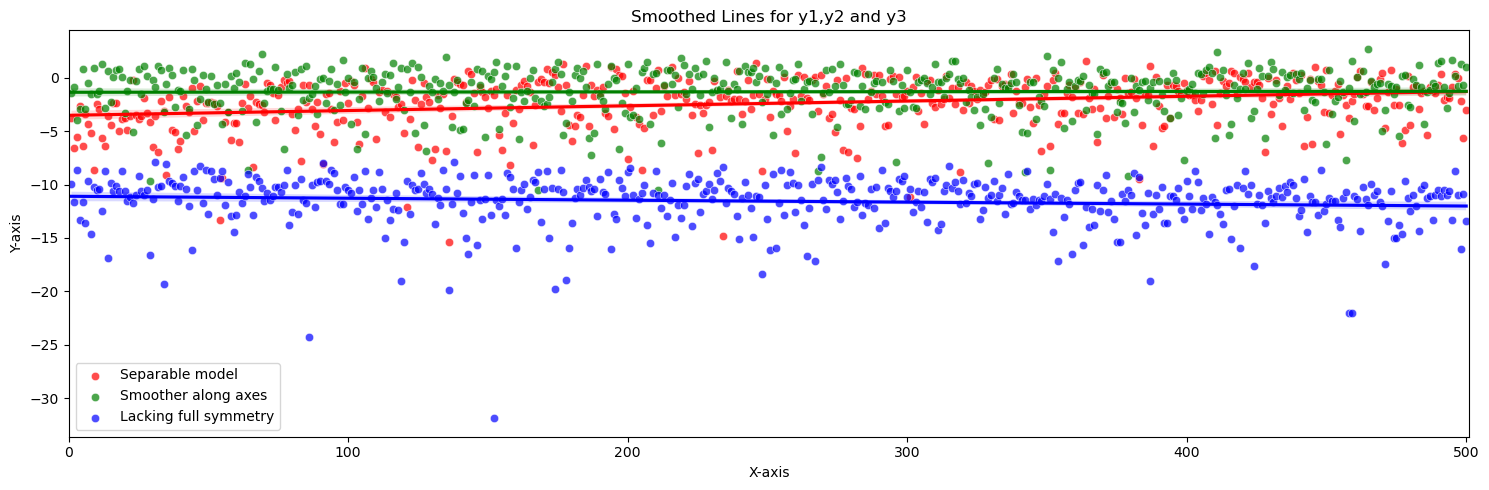

In [3]:
# Example usage
my_sim1(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5, cov_index=1)

Now we look at the behavior of eigen values.

In [5]:

def my_sim2(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3, range_val=5):

    x = np.random.uniform(x_min, x_max, n)
    y = np.random.uniform(y_min, y_max, n)

    s = x[:, None] - x
    t = y[:, None] - y

    # 1) separable model
    cov_mat1 = theta * np.exp(-np.abs(t) / range_val) * theta * np.exp(-np.abs(s) / range_val)

    eps = 1e-8
    abs_s = np.abs(s)

    a = 0.5
    

    # 2) symmetric, smoother along the axes MA 2003 (5.3)

    tmp1 = np.exp(-a * t) * ( erfc(np.sqrt(abs_s + eps) - a * t / (2 * np.sqrt(abs_s + eps))))
    tmp2 = np.exp( a*t) * erfc( np.sqrt(abs_s+ eps ) + a*t/(2*np.sqrt(abs_s+ eps )   )  )
    cov_mat2 = tmp1 + tmp2

    # symmetric, smoother along the axes  (6)
    a = 0.5  
    c=0.3
    eps = 1e-8

    r = np.abs(s) + eps

    tmp1 = (np.pi**2 / (16 * c**6)) * np.exp(a * r) * (
        erfc(c * a * np.abs(t)**0.5 + r / (2 * c * np.abs(t)**0.5))
    )
    tmp1_2 = 1 / a**3 - r / a**2 + (4 * c**4 * t**2) / r

    tmp2 = (np.pi**2 / (16 * c**6)) * np.exp(-a * r) * (
        erfc(c * a * np.abs(t)**0.5 - r / (2 * c * np.abs(t)**0.5))
    )
    tmp2_2 = 1 / a**3 + r / a**2 - (4 * c**4 * t**2) / r

    tmp3 = (np.pi**1.5 * np.abs(t)**0.5) / (4 * c**5 * a**2) * np.exp(
        -c**2 * a**2 * np.abs(t) - r**2 / (4 * c**2 * np.abs(t))
    )

    cov_mat2 = tmp1 * tmp1_2 + tmp2 * tmp2_2 + tmp3

    # lacking full symmetry
    a = 10
    beta_1 = 3
    beta_2 = 4
    c1 = a / beta_1**2
    c2 = a / beta_2**2
    b = 1
    var = 1 / 12 * (x_max - x_min)**2

    abs_s = np.abs(s) + eps
    t = t + eps
    v = 1.5
    d = 1
    z = 1
    yy = np.sqrt(beta_1**2 * abs_s**2 + beta_2**2 * t**2) 
    tau = b * beta_1 * beta_2 / (2 * a)
    yy = yy / 0.5

    tmp3 = var * (1 + yy) * np.exp(-yy)
    tmp4 = var * np.exp(-yy)
    cov_mat3 = a * ((2 * v + d + 1) * tmp3 - 2 * tau * (beta_1 * abs_s * z) * beta_2 * t * tmp4)

    eigen_values_1, eigenvectors_1 = np.linalg.eig(cov_mat1)
    eigen_values_2, eigenvectors_2 = np.linalg.eig(cov_mat2)
    eigen_values_3, eigenvectors_3 = np.linalg.eig(cov_mat3)

    # Assuming eigen_values_1, eigen_values_2, eigen_values_3 are your data
    n = len(eigen_values_1)
    data = pd.DataFrame({'x': np.arange(1, n + 1), 
                         'y1': np.log(eigen_values_1),
                         'y2': np.log(eigen_values_2),
                         'y3': np.log(eigen_values_3)})

    plt.figure(figsize=(10, 5))

    # Scatter plot for y1
    plt.scatter(data['x'], data['y1'], color='red', s=5, alpha=0.5, label='Separable model')

    # Scatter plot for y2
    plt.scatter(data['x'], data['y2'], color='green', s=5, alpha=0.3, label='Smoother along axes')

    # Scatter plot for y3
    plt.scatter(data['x'], data['y3'], color='blue', s=5, alpha=0.5, label='lacking full symmetry')

    # Set ylim
    plt.ylim(-5, 15)

 
    # Add labels, title, and legend
    plt.xlabel('Index j')
    plt.ylabel('Log Values')
    plt.title('Smoothed Lines for y1, y2, and y3')
    plt.legend()

    plt.tight_layout()
    plt.show()
 
    print(data.head())


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26416\2380215623.py:32: RuntimeWarning: divide by zero encountered in divide
  erfc(c * a * np.abs(t)**0.5 + r / (2 * c * np.abs(t)**0.5))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26416\2380215623.py:37: RuntimeWarning: divide by zero encountered in divide
  erfc(c * a * np.abs(t)**0.5 - r / (2 * c * np.abs(t)**0.5))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26416\2380215623.py:42: RuntimeWarning: divide by zero encountered in divide
  -c**2 * a**2 * np.abs(t) - r**2 / (4 * c**2 * np.abs(t))
c:\Users\joonw\anaconda3\envs\msds534\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


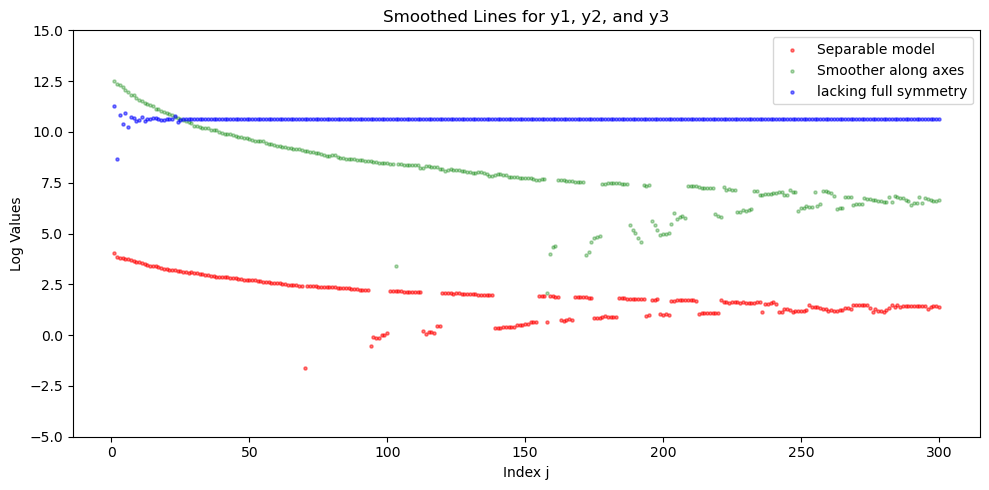

   x        y1         y2                   y3
0  1  4.019664  12.486913  11.259867+0.000000j
1  2  3.825636  12.344839   8.646652+0.000000j
2  3  3.799754  12.292860  10.823563+0.000000j
3  4  3.786380  12.212541  10.408609+0.000000j
4  5  3.763956  12.063458  10.909977+0.000000j


In [7]:
# Example usage
my_sim2(x_min=0, y_min=0, x_max=100, y_max=100, n=300, theta=3, range_val=6)